In [1]:
# To switch to using MATLAB optimiser, switch out commented line
from src.VMSI_nlopt import *
# from src.VMSI import *
from src.segment import Segmenter
import cv2

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Run VMSI pipeline against synthetically generated images

### One-step processing and inference

In [8]:
# Load example image
img_test = cv2.imread('./Images/benchmark_size_images/18.tiff', cv2.IMREAD_UNCHANGED)

# Without tiling
no_tiling = run_VMSI(img_test, is_labelled=True, tile=False, verbose=False)

# With tiling (tiling is automatically switched on)
tiling = run_VMSI(img_test, is_labelled=True, verbose=False)

##### Plot results

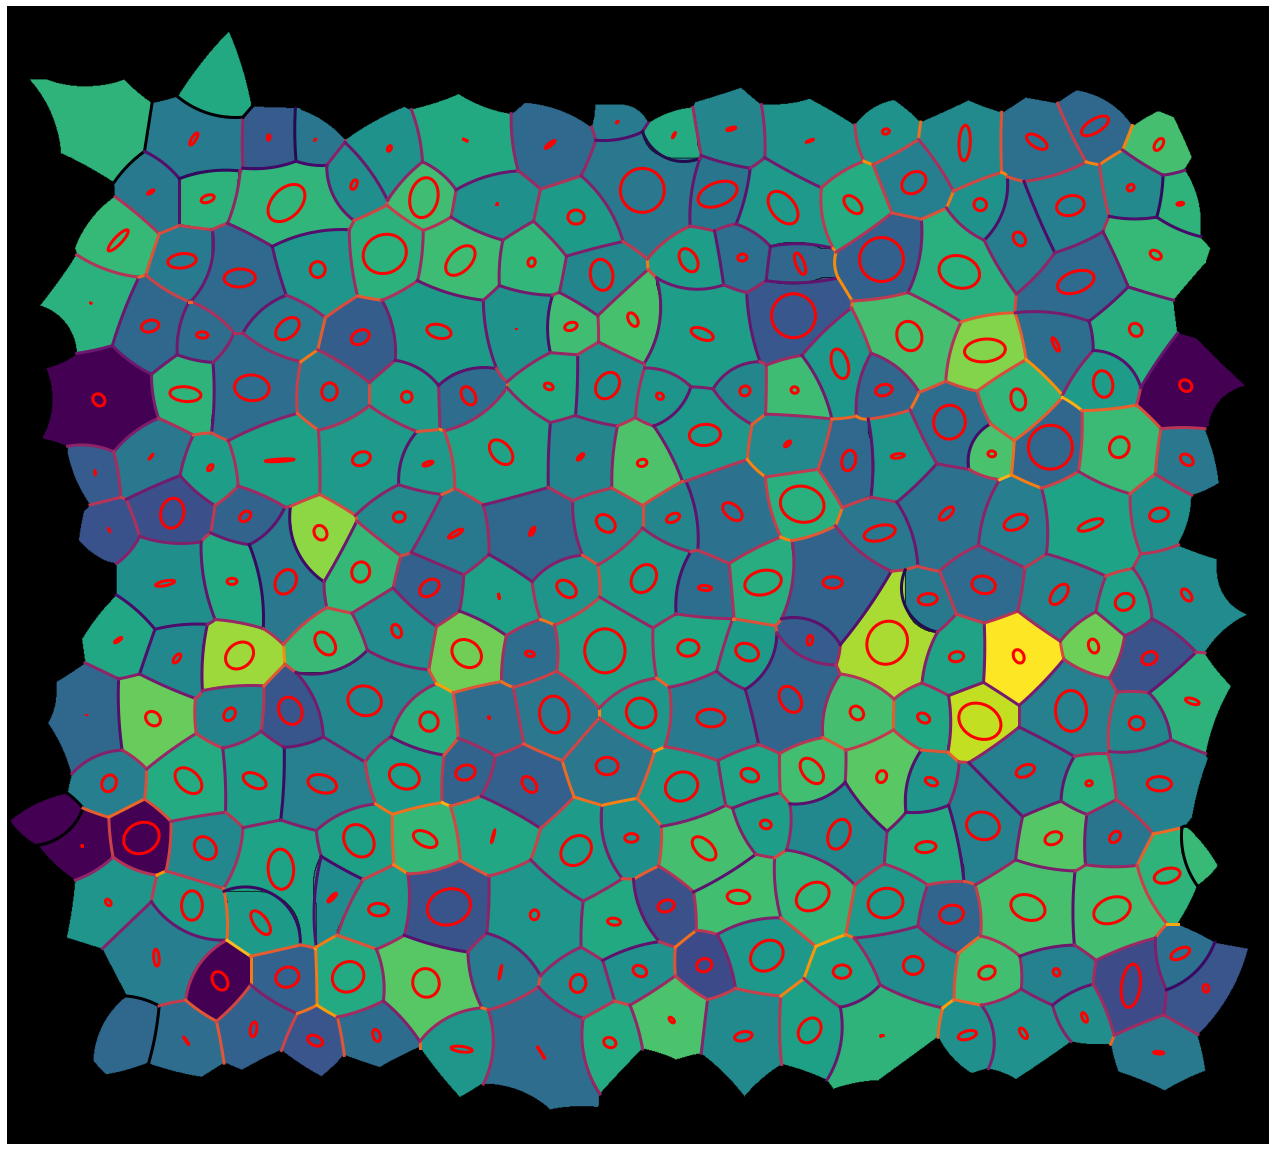

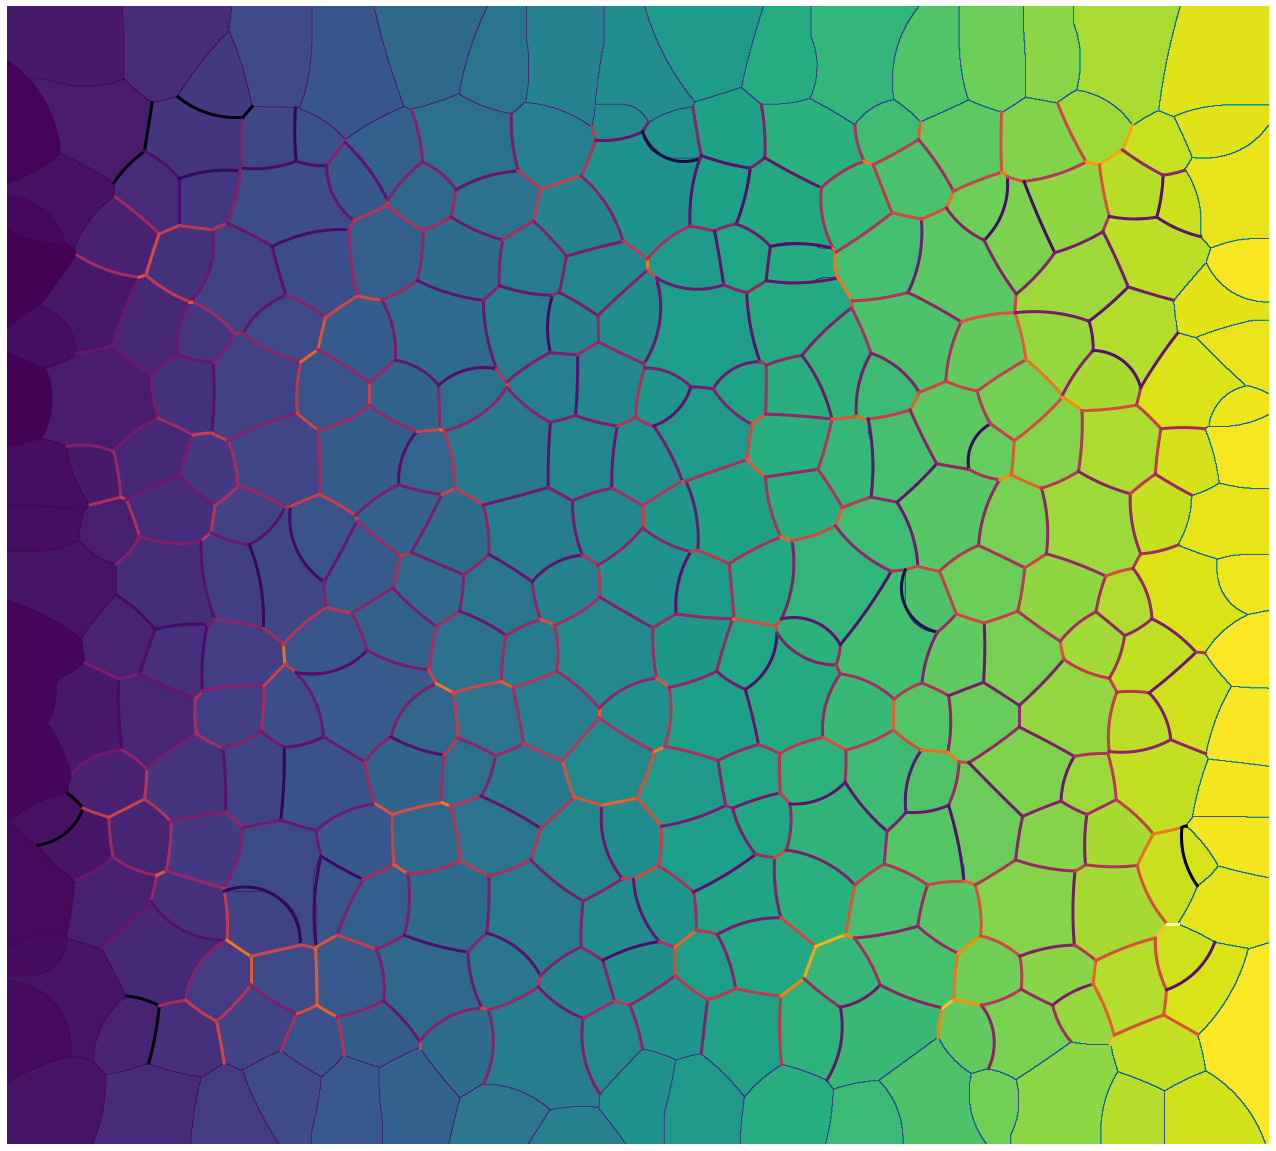

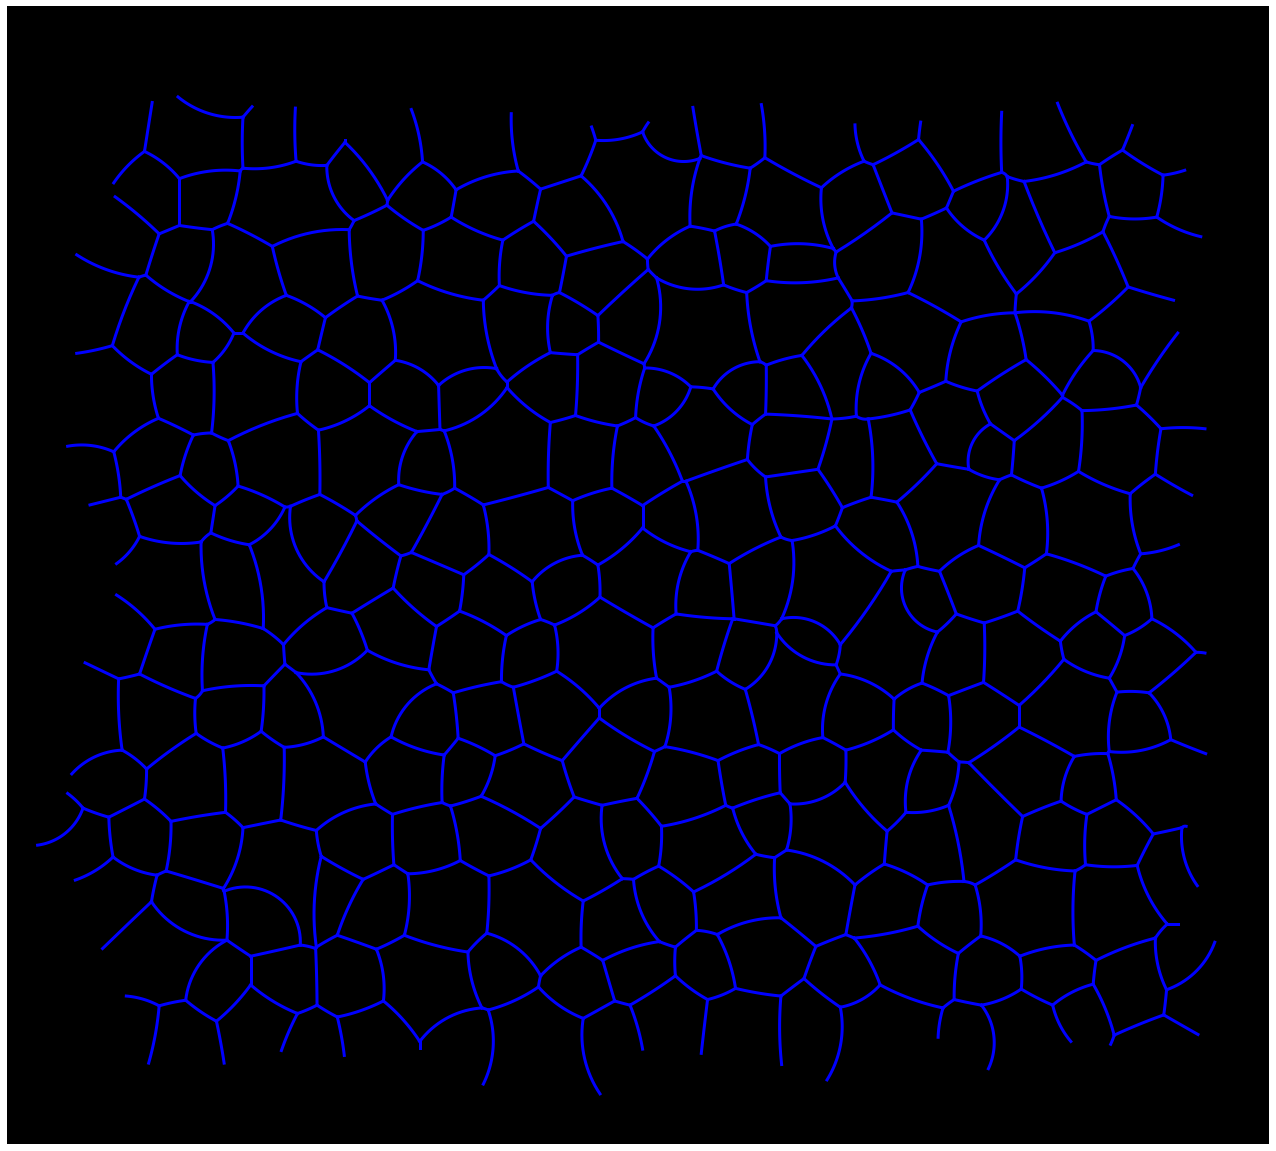

In [9]:
# Plot everything
tiling.plot(['tension','pressure','stress'], img_test)

# Plot tensions only
no_tiling.plot(['tension'], img_test)

# Plot CAP without background image
tiling.plot(['CAP'])

### Manually run pipeline without tiling
(Note: this can also be done with tiling but is not recommended as the returned VMSI object is not complete)

##### Load and process segmented image

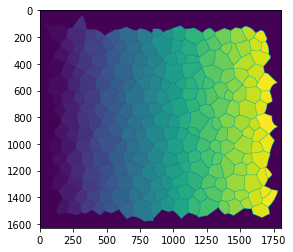

In [4]:
seg = Segmenter(masks=img_test, labelled=True)
VMSI_obj, labelled_mask = seg.process_segmented_image()

plt.imshow(labelled_mask)

##### Infer tensions and stress


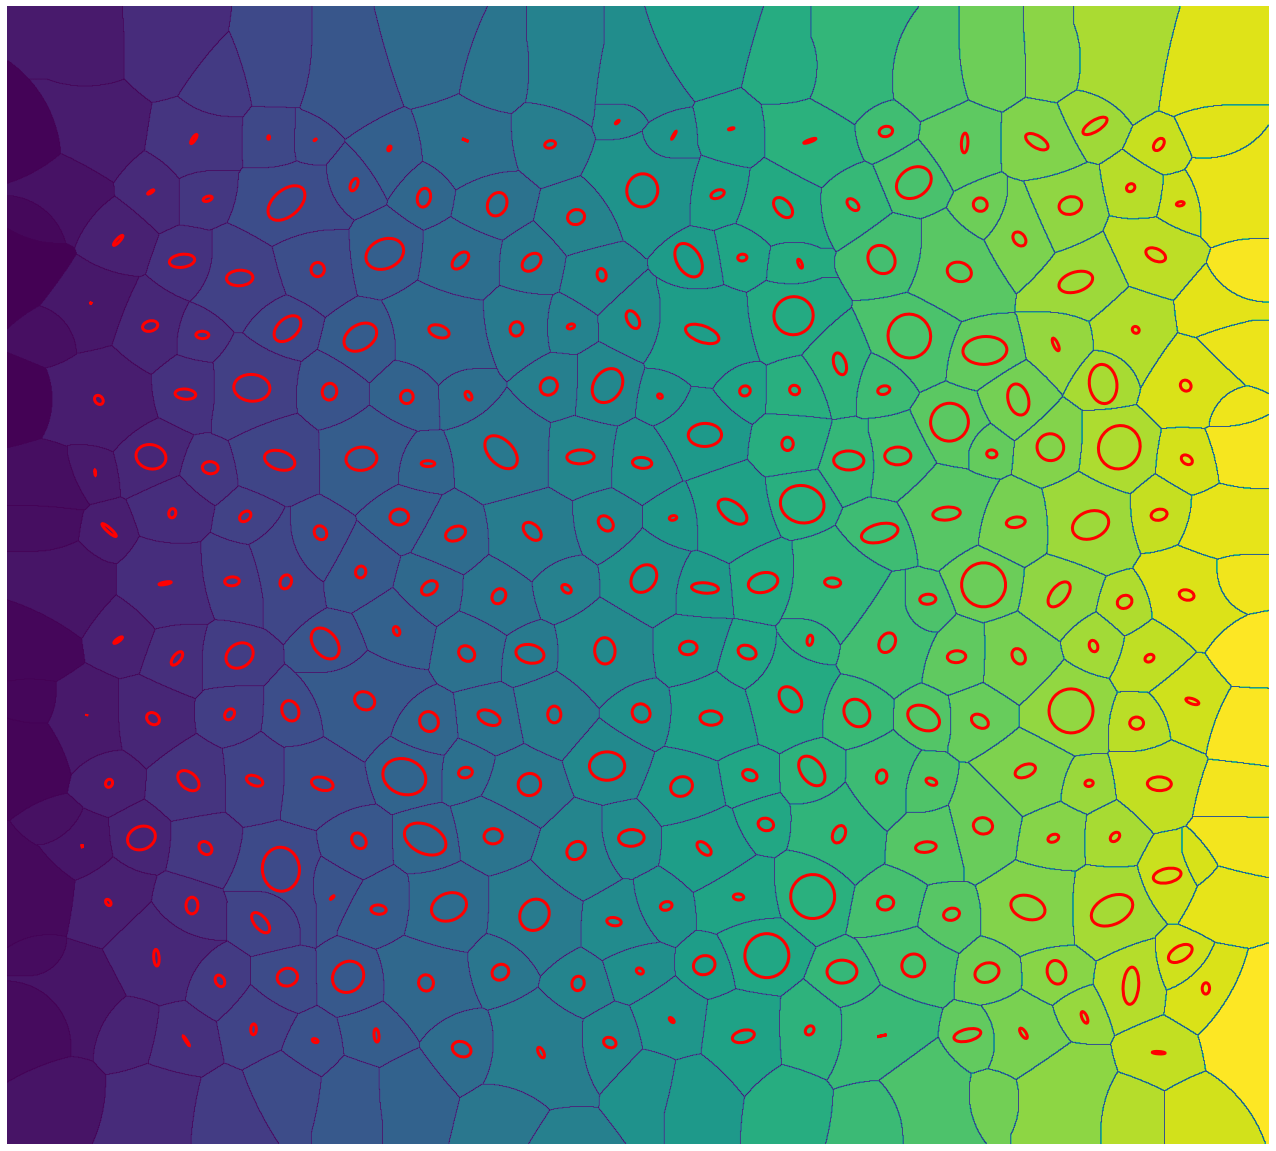

In [6]:
V_df = VMSI_obj.V_df
C_df = VMSI_obj.C_df
E_df = VMSI_obj.E_df

# create the model
model = VMSI(vertices=V_df, cells=C_df, edges=E_df, height=img_test.shape[0], width=img_test.shape[1], verbose=False)

# fit the model parameters
model.fit()

# compute stress tensor
model.compute_stresstensor()

# plot results
model.plot(['stress'], img_test)